# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
cities

['torbay',
 'tumannyy',
 'nanortalik',
 'los llanos de aridane',
 'severo-kurilsk',
 'kapaa',
 'gamba',
 'pisco',
 'hermanus',
 'puerto ayora',
 'marzuq',
 'victoria',
 'pevek',
 'snezhnogorsk',
 'tasiilaq',
 'westport',
 'new norfolk',
 'rikitea',
 'rocha',
 'atuona',
 'nyaunglebin',
 'lebu',
 'taolanaro',
 'ushuaia',
 'saint-joseph',
 'banyo',
 'mahebourg',
 'saskylakh',
 'provideniya',
 'puerto baquerizo moreno',
 'flin flon',
 'constitucion',
 'quballat',
 'derzhavinsk',
 'saint-philippe',
 'vaini',
 'kamenskoye',
 'mar del plata',
 'busselton',
 'potgietersrus',
 'salinopolis',
 'narsaq',
 'jamestown',
 'yellowknife',
 'chokurdakh',
 'mys shmidta',
 'port alfred',
 'te anau',
 'buala',
 'bluff',
 'ambunti',
 'hilo',
 'dikson',
 'coquimbo',
 'husavik',
 'qaanaaq',
 'sentyabrskiy',
 'san carlos de bariloche',
 'nador',
 'bengkulu',
 'saint-pierre',
 'petropavl',
 'bredasdorp',
 'korfovskiy',
 'avarua',
 'castro',
 'yar-sale',
 'salawagan',
 'tabiauea',
 'nizhneyansk',
 'bastia',
 'o

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = ["metric", "imperial"]
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

"http://api.openweathermap.org/data/2.5/weather?appid=a2ea56a1e9bb9d6ba98adcdbcb2dcb5a&units=['metric', 'imperial']&q="

In [5]:
response = requests.get(query_url + city).json()
response

{'coord': {'lon': -152.4072, 'lat': 57.79},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 278.88,
  'feels_like': 273.63,
  'temp_min': 278.88,
  'temp_max': 278.88,
  'pressure': 1012,
  'humidity': 87},
 'visibility': 3219,
 'wind': {'speed': 10.29, 'deg': 80},
 'rain': {'1h': 0.51},
 'clouds': {'all': 90},
 'dt': 1621471140,
 'sys': {'type': 1,
  'id': 7668,
  'country': 'US',
  'sunrise': 1621431465,
  'sunset': 1621492486},
 'timezone': -28800,
 'id': 5866583,
 'name': 'Saint Paul Harbor',
 'cod': 200}

In [6]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'rain', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
data = [] #empty list for the weather data
count = 0 #incremements
for city in cities:
    maps = requests.get(query_url + city).json()
    
    try: 
        weather_dict = {
            "City":maps['name'],
            "Latitude":maps["coord"]["lat"],
            "Longitude":maps["coord"]["lon"],
            "Max Temp":maps["main"]["temp_max"],
            "Humidity":maps["main"]["humidity"],
            "Clouds":maps["clouds"]["all"], 
            "Wind (in mph)":maps["wind"]["speed"],
            "Country":maps["sys"]["country"],
            "Date":maps["dt"]}
        
        data.append(weather_dict)
        count = count + 1 
        print(f"Processing {count}. {maps['name']}")
    except: 
        print("City Unknown. Skipping... ")

maps

Processing 1. Torbay
City Unknown. Skipping... 
Processing 2. Nanortalik
Processing 3. Los Llanos de Aridane
Processing 4. Severo-Kuril'sk
Processing 5. Kapaa
Processing 6. Gamba
Processing 7. Pisco
Processing 8. Hermanus
Processing 9. Puerto Ayora
Processing 10. Marzuq
Processing 11. Hong Kong
Processing 12. Pevek
Processing 13. Snezhnogorsk
Processing 14. Tasiilaq
Processing 15. Westport
Processing 16. New Norfolk
Processing 17. Rikitea
Processing 18. Rocha
Processing 19. Atuona
Processing 20. Nyaunglebin
Processing 21. Lebu
City Unknown. Skipping... 
Processing 22. Ushuaia
Processing 23. Saint-Joseph
Processing 24. Banyo
Processing 25. Mahébourg
Processing 26. Saskylakh
Processing 27. Provideniya
Processing 28. Puerto Baquerizo Moreno
Processing 29. Flin Flon
Processing 30. Constitución
Processing 31. Goubellat
Processing 32. Derzhavīnsk
Processing 33. Saint-Philippe
Processing 34. Vaini
City Unknown. Skipping... 
Processing 35. Mar del Plata
Processing 36. Busselton
City Unknown. S

Processing 300. Macapá
Processing 301. Namatanai
Processing 302. Qeshm
Processing 303. Porto-Novo
Processing 304. Thompson
Processing 305. Kassala
Processing 306. Maragogi
Processing 307. Saint-Augustin
City Unknown. Skipping... 
Processing 308. Gómez Palacio
Processing 309. Port Blair
Processing 310. Sychëvka
Processing 311. Genhe
City Unknown. Skipping... 
Processing 312. Alexandria
Processing 313. Hakkâri Province
Processing 314. Aleppo Governorate
Processing 315. Upata
Processing 316. Jaisalmer
City Unknown. Skipping... 
Processing 317. Brigantine
Processing 318. Gari
Processing 319. Olafsvik
Processing 320. Portland
Processing 321. Camacupa
Processing 322. Tazmalt
Processing 323. Ende
Processing 324. Rawson
Processing 325. Kutum
Processing 326. Cidreira
Processing 327. Shelburne
Processing 328. Poum
Processing 329. São João da Barra
Processing 330. Ibrā’
Processing 331. Bathsheba
Processing 332. Geraldton
Processing 333. Touros
Processing 334. Tual
Processing 335. Prachuap Khiri K

{'coord': {'lon': -125.5528, 'lat': 48.9329},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 285.4,
  'feels_like': 284.64,
  'temp_min': 285.32,
  'temp_max': 289.87,
  'pressure': 1019,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 1.79, 'deg': 303, 'gust': 4.02},
 'clouds': {'all': 35},
 'dt': 1621471554,
 'sys': {'type': 2,
  'id': 19458,
  'country': 'CA',
  'sunrise': 1621427687,
  'sunset': 1621483374},
 'timezone': -25200,
 'id': 6171633,
 'name': 'Ucluelet',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame(data)
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudy,Wind (in mph),Country,Date
0,Torbay,47.6666,-52.7314,279.97,74,75,5.14,CA,1621471766
1,Nanortalik,60.1432,-45.2371,275.55,78,4,3.75,GL,1621471231
2,Los Llanos de Aridane,28.6585,-17.9182,293.77,55,0,7.00,ES,1621471198
3,Severo-Kuril'sk,50.6789,156.1250,279.54,82,61,1.14,RU,1621471767
4,Kapaa,22.0752,-159.3190,300.14,72,75,1.79,US,1621471767


In [14]:
weather_df.to_csv("weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_df[weather_df.Humidity > 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudy,Wind (in mph),Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

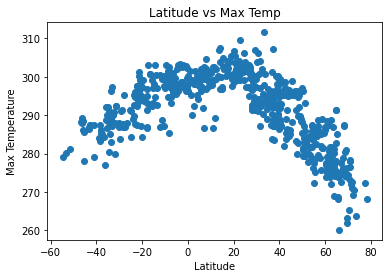

In [16]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

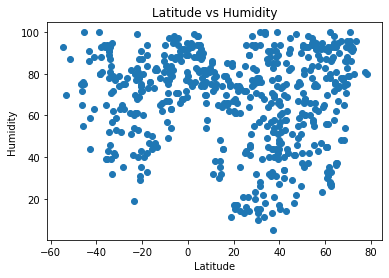

In [17]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

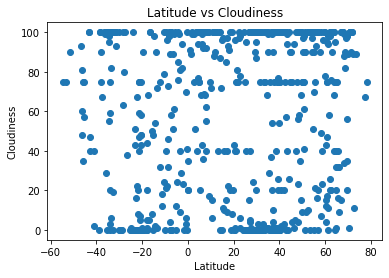

In [18]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudy']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

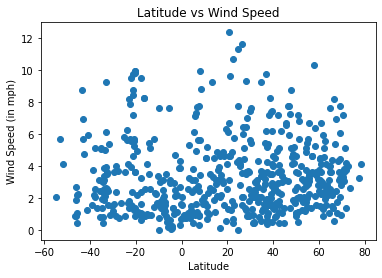

In [57]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind (in mph)']
plt.scatter(x_values,y_values)
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (in mph)')
plt.show()

## Linear Regression

In [22]:
north = weather_df[weather_df.Latitude >=0]
north.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudy,Wind (in mph),Country,Date
0,Torbay,47.6666,-52.7314,279.97,74,75,5.14,CA,1621471766
1,Nanortalik,60.1432,-45.2371,275.55,78,4,3.75,GL,1621471231
2,Los Llanos de Aridane,28.6585,-17.9182,293.77,55,0,7.00,ES,1621471198
3,Severo-Kuril'sk,50.6789,156.1250,279.54,82,61,1.14,RU,1621471767
4,Kapaa,22.0752,-159.3190,300.14,72,75,1.79,US,1621471767


In [23]:
south = weather_df[weather_df.Latitude <0]
south.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudy,Wind (in mph),Country,Date
5,Gamba,-2.6500,10.0000,298.54,92,94,2.51,GA,1621471189
6,Pisco,-13.7000,-76.2167,292.60,82,1,5.14,PE,1621471767
7,Hermanus,-34.4187,19.2345,288.71,91,100,0.45,ZA,1621471768
8,Puerto Ayora,-0.7393,-90.3518,296.79,89,6,2.68,EC,1621471768
15,New Norfolk,-42.7826,147.0587,287.40,59,47,4.76,AU,1621471770


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
x_values = north['Latitude']
y_values = north['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      287.075495
1      281.890336
2      294.975084
3      285.823611
4      297.711042
          ...    
558    278.064201
560    298.903621
561    290.157598
562    294.957837
564    286.549232
Name: Latitude, Length: 389, dtype: float64


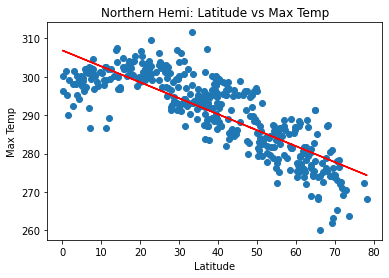

In [34]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemi: Latitude vs Max Temp")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
x_values = south['Latitude']
y_values = south['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

5      299.770428
6      295.889629
7      288.613150
8      300.441472
15     285.675719
          ...    
542    299.199336
550    292.933901
554    294.402880
559    295.497440
563    293.448765
Name: Latitude, Length: 176, dtype: float64


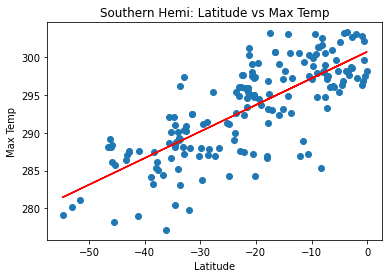

In [36]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemi: Latitude vs Max Temp")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [37]:
x_values = north['Latitude']
y_values = north['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      66.175458
1      66.847462
2      65.151660
3      66.337704
4      64.797076
         ...    
558    67.343335
560    64.642516
561    65.776013
562    65.153895
564    66.243662
Name: Latitude, Length: 389, dtype: float64


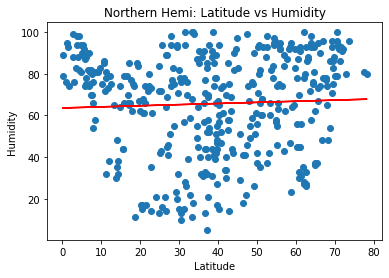

In [38]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemi: Latitude vs Humidity")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [39]:
x_values = south['Latitude']
y_values = south['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

5      74.321376
6      72.769782
7      69.860550
8      74.589669
15     68.686126
         ...    
542    74.093046
550    71.588043
554    72.175360
559    72.612980
563    71.793892
Name: Latitude, Length: 176, dtype: float64


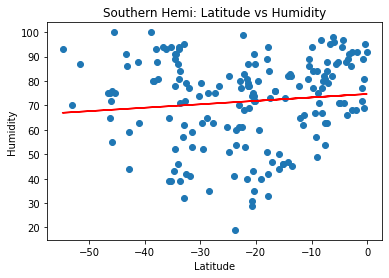

In [40]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemi: Latitude vs Humidity")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [41]:
x_values = north['Latitude']
y_values = north['Cloudy']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      58.446712
1      59.300986
2      57.145227
3      58.652965
4      56.694468
         ...    
558    59.931356
560    56.497986
561    57.938925
562    57.148068
564    58.533416
Name: Latitude, Length: 389, dtype: float64


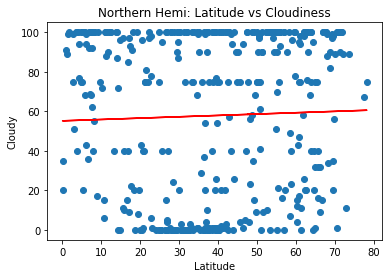

In [43]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudy')
plt.title("Northern Hemi: Latitude vs Cloudiness")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [44]:
x_values = south['Latitude']
y_values = south['Cloudy']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

5      41.346770
6      46.747676
7      56.874352
8      40.412877
15     60.962374
         ...    
542    42.141558
550    50.861163
554    48.816786
559    47.293486
563    50.144627
Name: Latitude, Length: 176, dtype: float64


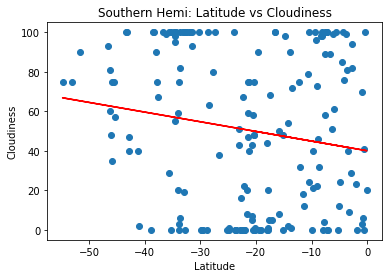

In [45]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemi: Latitude vs Cloudiness")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [52]:
x_values = north['Latitude']
y_values = north['Wind (in mph)']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      3.404459
1      3.445534
2      3.341880
3      3.414376
4      3.320207
         ...   
558    3.475844
560    3.310760
561    3.380043
562    3.342017
564    3.408628
Name: Latitude, Length: 389, dtype: float64


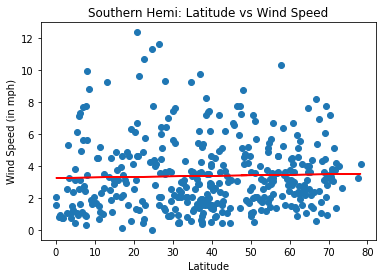

In [53]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (in mph)')
plt.title("Southern Hemi: Latitude vs Wind Speed")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [54]:
x_values = south['Latitude']
y_values = south['Wind (in mph)']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

5      2.622865
6      2.912059
7      3.454296
8      2.572859
15     3.673192
         ...   
542    2.665422
550    3.132317
554    3.022850
559    2.941284
563    3.093950
Name: Latitude, Length: 176, dtype: float64


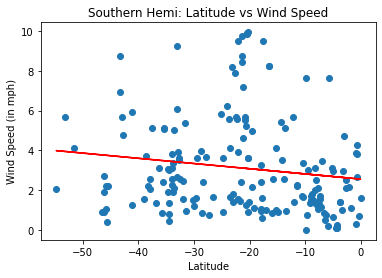

In [55]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (in mph)')
plt.title("Southern Hemi: Latitude vs Wind Speed")

# Show plot
plt.show()